In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

GETTING THE WHOLE DATASET

In [2]:
df = pd.read_csv('./WDI_csv/WDIData.csv');

GETTING THE COUNTRIES DATA TO FILTER THE UNWANTED REGIONS(ARAB WORLD, CARRIBBEAN SMALL STATES ETC)

In [3]:
countries_df = pd.read_csv('./WDI_csv/WDICountry.csv');
countries_df.dropna(subset=['Currency Unit' , '2-alpha code', 'WB-2 code'], inplace= True);
countries_df = countries_df[['Country Code', 'Table Name']]

Function to get rid of unwanted countries

In [4]:
def df_by_indicator(indicator):
    return df[ (df['Indicator Code'] == indicator) & (df['Country Code'].isin(countries_df['Country Code']))]

FILTERING THE DATASET FOR POPULATION

In [5]:
df_pop = df_by_indicator('SP.POP.GROW')
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
76336,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.816077,1.876528,1.934999,1.992521,2.049423,2.105369,...,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163,2.490790,NaN
77936,Albania,ALB,Population growth (annual %),SP.POP.GROW,3.015423,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,NaN
79536,Algeria,DZA,Population growth (annual %),SP.POP.GROW,2.511434,2.485473,2.470737,2.492035,2.560435,2.656201,...,1.720717,1.821358,1.924787,2.006614,2.036092,2.000666,1.919959,1.825463,1.738456,NaN
81136,American Samoa,ASM,Population growth (annual %),SP.POP.GROW,1.403903,2.335966,3.033668,3.558598,3.661243,3.557431,...,-1.418038,-1.054862,-0.571394,-0.162822,0.139320,0.234776,0.180222,0.111575,0.075512,NaN
82736,Andorra,AND,Population growth (annual %),SP.POP.GROW,7.050663,6.941532,6.692697,6.559522,6.241511,5.998800,...,0.714106,-0.015393,-0.829969,-1.588653,-2.013314,-1.956178,-1.537836,-0.944017,-0.409736,NaN


FILTERING THE DATASET FOR GDP

In [6]:
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
75728,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,21.020649,8.433290,6.113685,14.434741,3.900575,2.690522,1.310040,2.366712,2.595542,NaN
77328,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.352610,3.710058,2.550161,1.419968,1.000755,1.774369,2.218752,3.352159,3.841364,NaN
78928,Algeria,DZA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-13.605441,-19.685042,34.313729,5.839413,6.206898,...,1.632244,3.634145,2.891866,3.374769,2.767639,3.789121,3.763467,3.300000,1.700000,NaN
80528,American Samoa,ASM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.237288,0.442478,0.293686,-4.392387,-2.756508,0.944882,1.248050,-2.619414,NaN,NaN
82128,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.873197,NaN
83728,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.412910,3.452875,3.873331,5.177594,6.842717,4.703971,2.999747,-0.813494,0.721699,NaN
85328,Antigua and Barbuda,ATG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.107536,-7.200024,-2.079127,3.506609,-0.103939,5.101940,4.060219,5.342479,3.337049,NaN
86928,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,...,-5.918525,10.125398,6.003952,-1.026420,2.405324,-2.512615,2.731160,-1.822542,2.863923,NaN
88528,Armenia,ARM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.149989,2.200000,4.700000,7.200000,3.300000,3.600000,3.200000,0.200000,7.500000,NaN
90128,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')


In [8]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
low_income_countries = df_gni[df_gni['2017'] < 1005]
high_income_countries = df_gni[df_gni['2017'] > 12235]

#taking the mean of GNI of last 5 years and categorizing it as low income , high income economy
conditions = [
    df_gni.loc[:,'2012':'2017'].mean(axis=1) < 1026,
    (df_gni.loc[:,'2012':'2017'].mean(axis=1) > 1026) & ( df_gni.loc[:,'2012':'2017'].mean(axis=1) < 4035),
    (df_gni.loc[:,'2012':'2017'].mean(axis=1) > 4036) & ( df_gni.loc[:,'2012':'2017'].mean(axis=1) < 12475),
    df_gni.loc[:,'2012':'2017'].mean(axis=1) > 12476]
choices = ['low income', 'lower middle-income', 'upper middle-income', 'high income']
df_gni['income_Level']  = np.select(conditions, choices)
df_gni

/Users/nilesh.vijayrania/masters/Research-Methods/myvenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62,income_Level
75761,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1590.0,1680.0,1900.0,1940.0,1950.0,1940.0,1970.0,2000.0,NaN,lower middle-income
77361,Albania,ALB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9540.0,10210.0,10450.0,10750.0,11360.0,11470.0,11750.0,12120.0,NaN,upper middle-income
78961,Algeria,DZA,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12580.0,12850.0,13160.0,13420.0,13900.0,14220.0,14870.0,15050.0,NaN,high income
80561,American Samoa,ASM,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
82161,Andorra,AND,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83761,Angola,AGO,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5210.0,5360.0,5550.0,5900.0,6130.0,6250.0,6090.0,6060.0,NaN,upper middle-income
85361,Antigua and Barbuda,ATG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,18310.0,17960.0,18580.0,18980.0,20040.0,20970.0,22090.0,22980.0,NaN,high income
86961,Argentina,ARG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,17710.0,19070.0,19120.0,19730.0,19400.0,19630.0,19260.0,20270.0,NaN,high income
88561,Armenia,ARM,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6890.0,7270.0,7950.0,8490.0,8790.0,9090.0,9020.0,10060.0,NaN,upper middle-income
90161,Aruba,ABW,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


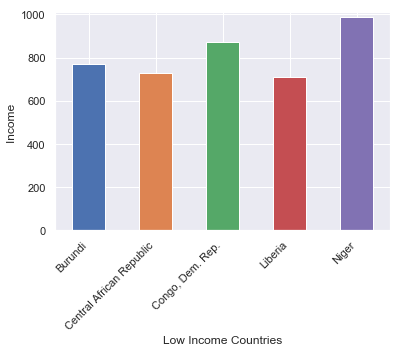

In [9]:
sns.set()
fig = low_income_countries["2017"].plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Income ')
plt.xlabel('Low Income Countries')
fig.set_xticklabels(low_income_countries["Country Name"], rotation = 45, ha="right")
plt.show()

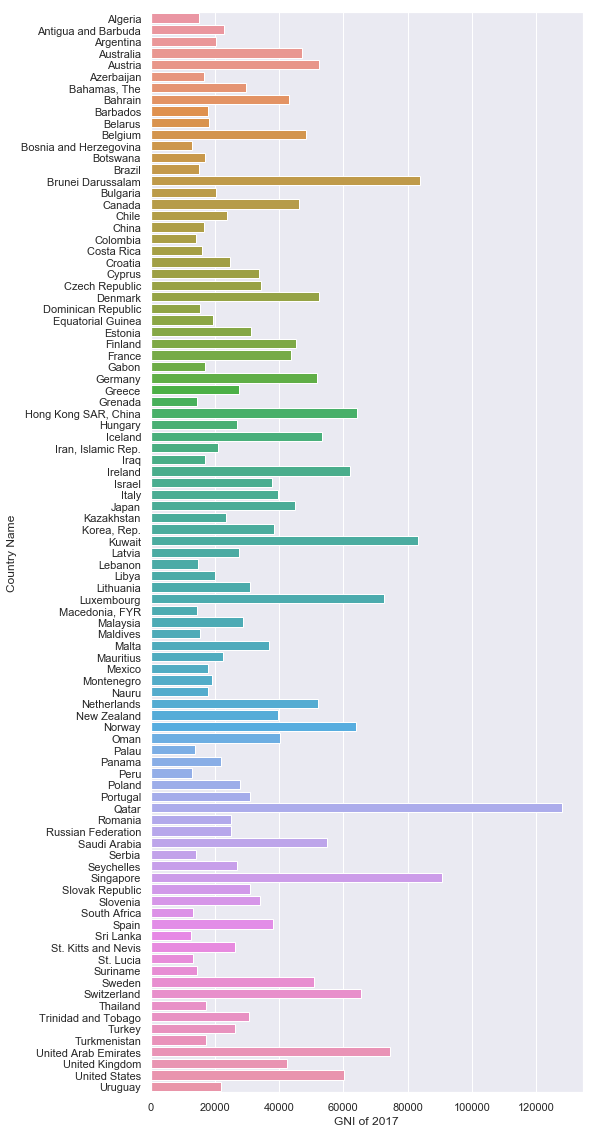

In [10]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);
fig.set_figheight(15);
g = sns.barplot(x='2017',y='Country Name', data=high_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

In [11]:
tot_pop = df_by_indicator('SP.POP.TOTL')
df_pop = df_by_indicator('SP.POP.GROW')
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')

In [12]:
merged_data = pd.concat([df_pop, df_gdp], ignore_index=True)
merged_data = merged_data.set_index(['Country Name' , 'Indicator Code']).stack().unstack()

In [13]:
correlation = pd.DataFrame(np.repeat(-100, len(merged_data)/2), columns=['corr'])
correlation['corr'] = correlation['corr'].astype('float64');

#Listing all correlation for each country

In [14]:
temp = merged_data.drop(columns=['Country Code', 'Indicator Name'])
for i in np.arange(0, len(correlation) - 1): 
    correlation.loc[i, 'Country Name'] = temp.index.get_level_values(0)[2*i];
    correlation.loc[i, 'corr'] = temp.iloc[2*i: 2*i + 2].T.astype('float64').corr().iloc[(0,1)]
    
correlation = correlation[['Country Name','corr']]
correlation.head()


,Country Name,corr
0,Afghanistan,-0.092639
1,Albania,-0.098580
2,Algeria,0.076002
3,American Samoa,0.262554
4,Andorra,0.411949


Getting all countries by various income levels

In [15]:
income_levels = df_gni[['Country Name','income_Level']].reset_index().drop(columns=['index']);
correlation_table = pd.concat([correlation.set_index('Country Name'),income_levels.set_index('Country Name')], axis=1, join='inner').reset_index()

#Selecting Countries with stronger correction i.e. corr > 0.5 or < -0.5

In [16]:
high_corr = correlation_table[(correlation_table['corr'] >= 0.5) | (correlation_table['corr'] <= -0.5)].sort_values('corr')
high_corr

,Country Name,corr,income_Level
17,Belarus,-0.689645,high income
60,Eritrea,-0.628179,0
87,Iceland,0.512940,high income
210,Virgin Islands (U.S.),0.515959,0
138,Netherlands,0.518132,high income
117,"Macedonia, FYR",0.520824,high income
180,St. Lucia,0.543923,high income
106,Kyrgyz Republic,0.564109,lower middle-income
32,Cabo Verde,0.572184,upper middle-income
97,Japan,0.581730,high income


#It Seems that high income countries has mildly positive linear relationship between GDP growth and population growth, but Belarus as an expection shows high negative linear relationship.

Whereas all low income countires except liberia has no such linear relationship. Liberia shows that there GDP growth and population growth are positively correlated. 

In [50]:
merged_data2 = merged_data.reset_index()
merged_data2 = merged_data2[merged_data2['Country Name'].isin(high_corr.iloc[:]['Country Name'].tolist())].drop(columns=['Indicator Name', 'Country Code']);
merged_data2 = merged_data2.reset_index().drop(columns=['index'])

In [39]:
merged_data2 = merged_data2.melt(id_vars=['Country Name','Indicator Code'], var_name='year', value_name = 'percentage')

Plot for all the countries who has high correlation except Liberia (because of some outliers in Libera we decided not to plot it with other countires as it was increasing the data scale too much)

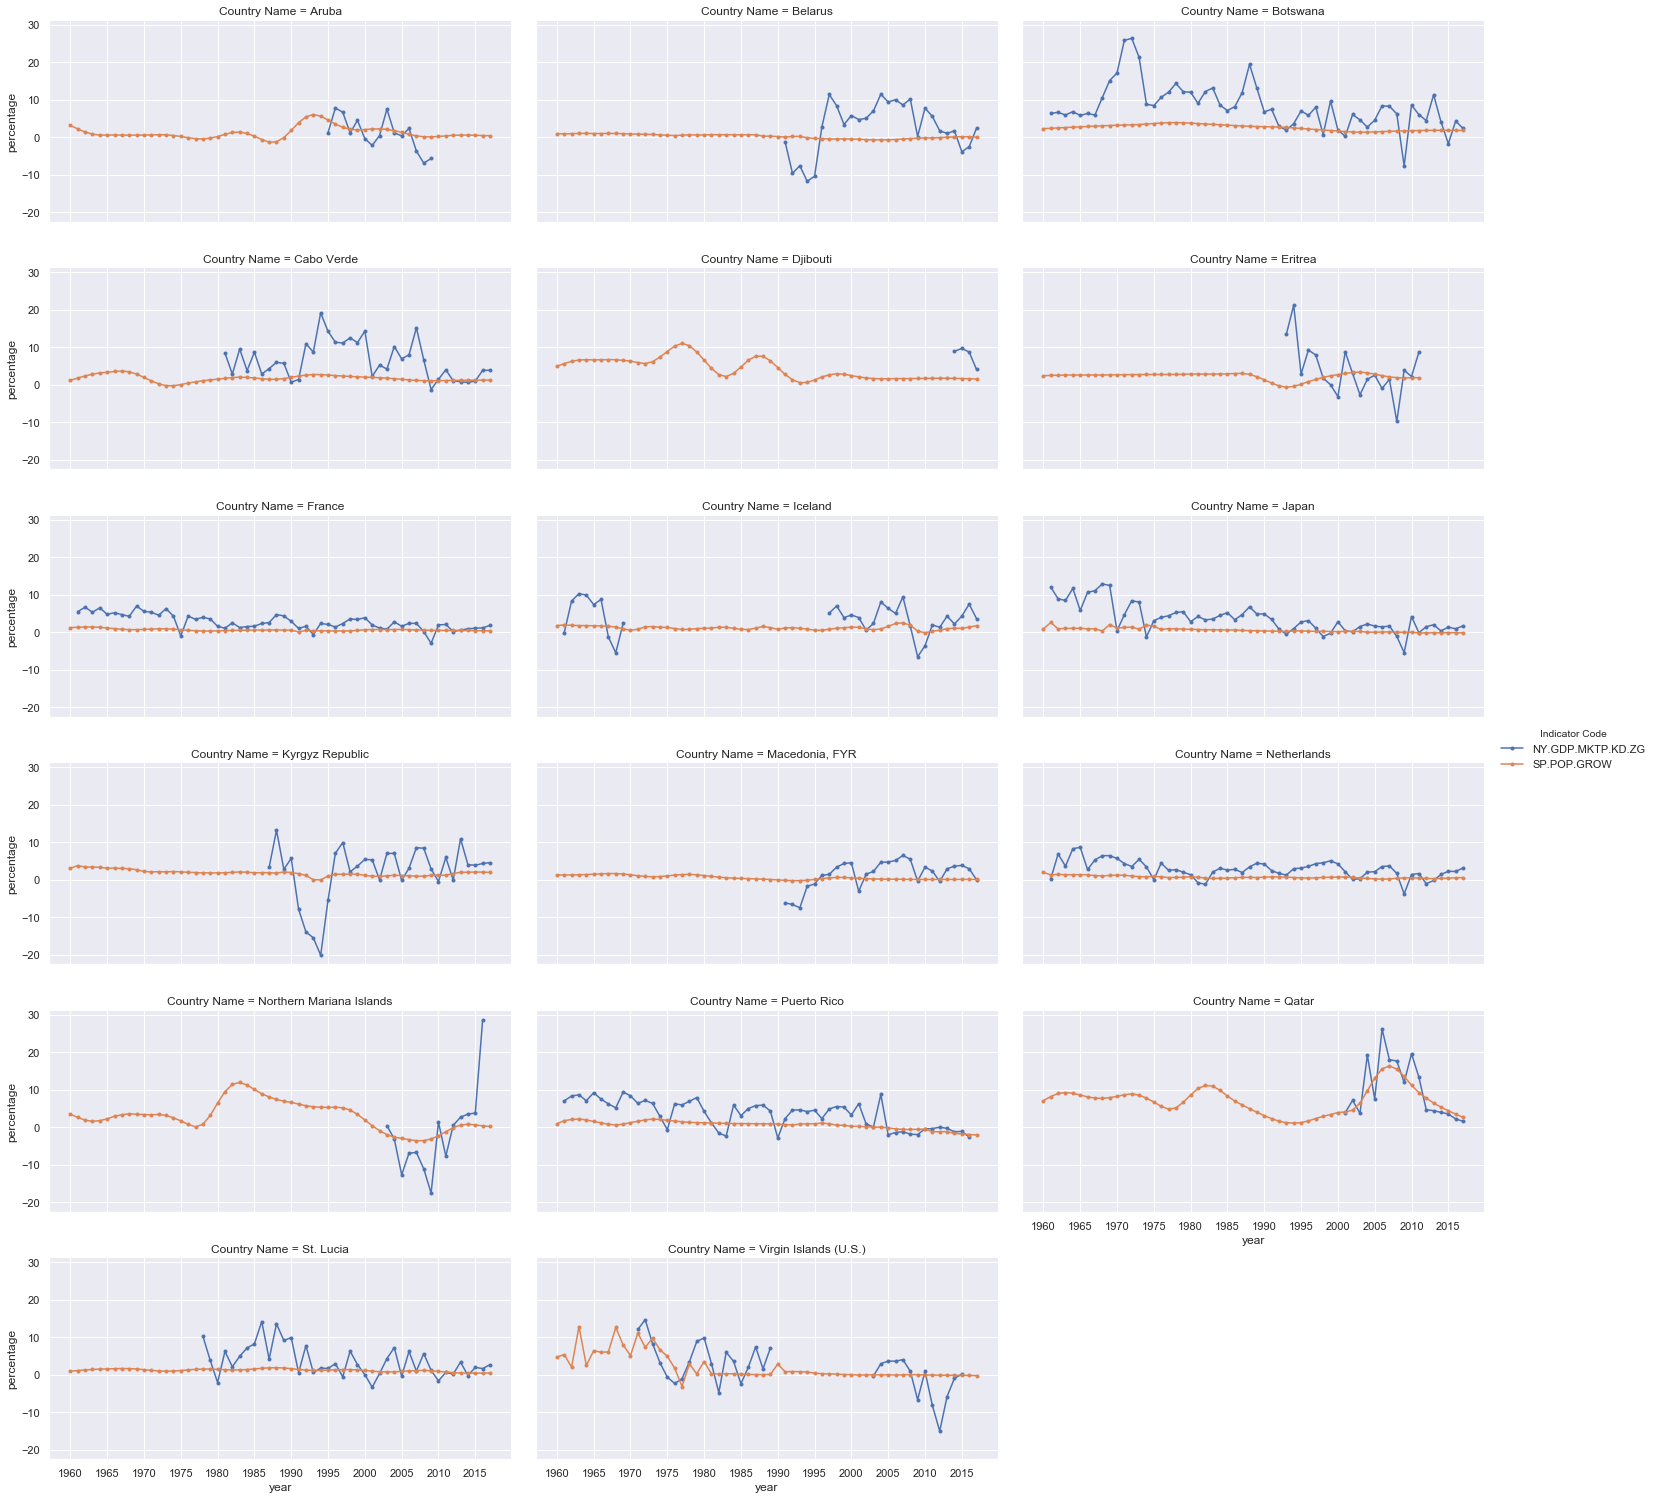

In [49]:
g = sns.FacetGrid(merged_data2[merged_data2['Country Name'] != 'Liberia'], col="Country Name", hue="Indicator Code",col_wrap=3, height=3.5, aspect=2, dropna=False)

g = g.map(plt.plot, "year", "percentage",marker=".").add_legend()
g.set(xticks=merged_data.columns[2::5])


Plot for Liberia Only

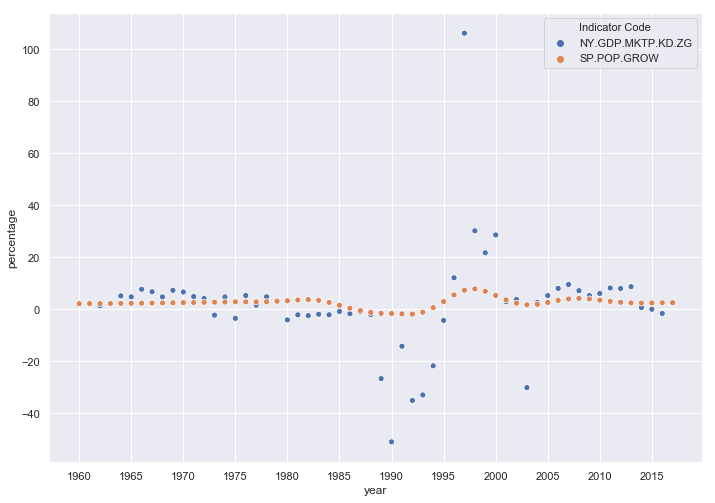

In [48]:
fig = sns.scatterplot(data = merged_data2[merged_data2['Country Name'] == 'Liberia'] , x = 'year', y='percentage', hue="Indicator Code");
plt.xticks(merged_data.columns[2::5]);
plt.show(fig)


# Per year Annual Population Growth in %

In [23]:
pop_growth=[]
Years = []
for i in range(1960,2018):
    pop_growth.append(df_pop[str(i)].sum() / 215)
    Years.append(i)


#Created two lists and then merging them and forming a table which has Years from 1960-2017 and their respective growth of population(%)

In [24]:
temp1 = pd.DataFrame(np.array(pop_growth))
temp2 = pd.DataFrame(np.array(Years))

frames = [temp2,temp1]

In [25]:
yearly_pop_g = pd.concat(frames,axis=1)
yearly_pop_g.columns = ['Year','Annual Population Growth (%)']

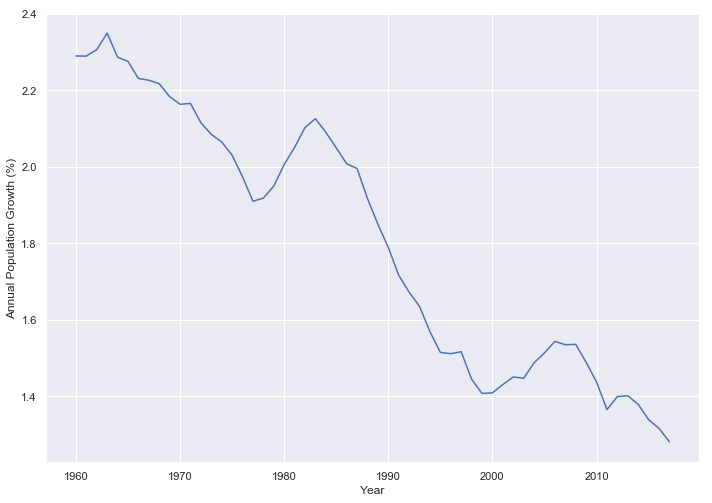

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = sns.lineplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g, size_order=1)

## Plot Linear Regression Population Growth

/Users/nilesh.vijayrania/masters/Research-Methods/myvenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


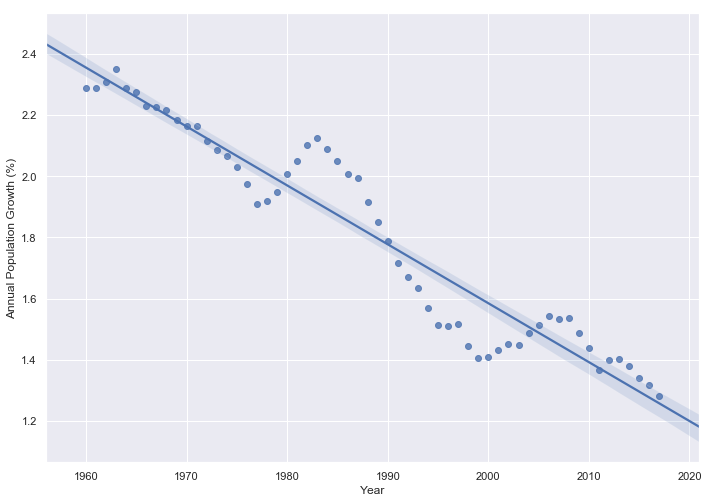

In [27]:
sns.regplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g);

## Create Linear Regression Model

In [28]:
X = yearly_pop_g[['Year']]
y = yearly_pop_g['Annual Population Growth (%)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 

In [29]:
y_prediction = lm.predict(X_test)
RMSE = np.mean((y_test - y_prediction)**2);
#Root mean squared error of our linear model is 0.01.
RMSE 

0.010109880150349861

In [30]:
R2_training = lm.score(X_test, y_test);
R2_test = lm.score(X_train, y_train);
[R2_training ,R2_test]

[0.9044178049386156, 0.9241128257501415]

Since the R2 value of the LM on test set and training set is ~ 90% which explains that the linear model explains the variability in population well.

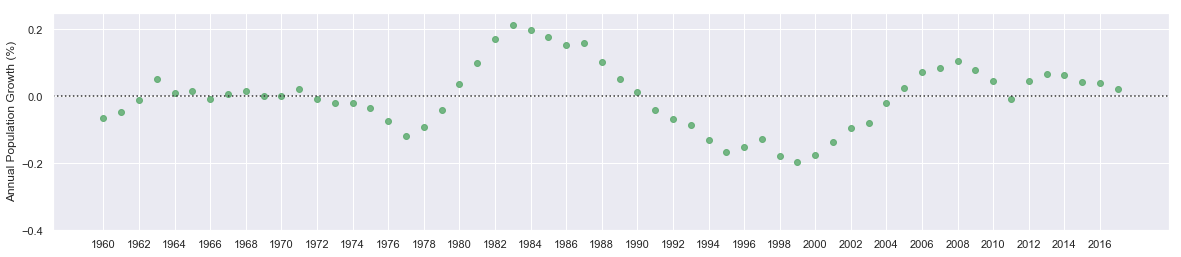

In [31]:
#plotting the residuals
plt.figure(figsize=(20,4))
fig = sns.residplot(x=  X.values, y=(y - lm.predict(X)), color="g")
plt.xticks(X.values[0::2])
plt.yticks(np.arange(-0.4, 0.4, 0.2))
plt.show(fig)

/Users/nilesh.vijayrania/masters/Research-Methods/myvenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


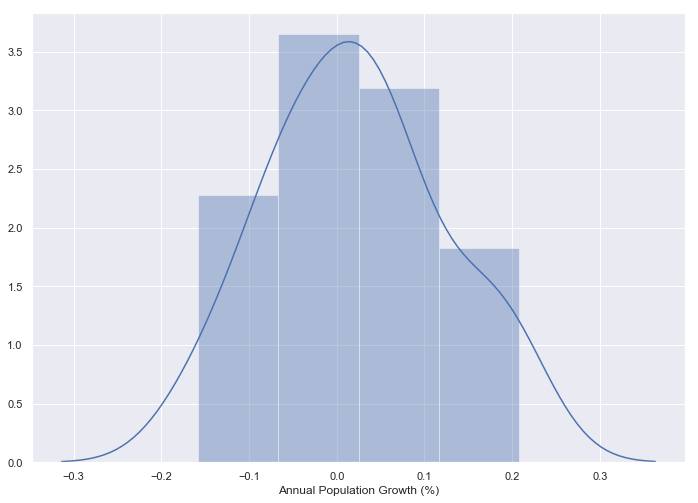

In [32]:
sns.distplot((y_test - y_prediction))


## Use model to predict up until year 2090 with 5 years interval

In [33]:
predict_years = np.arange(2020,2100)
prediction_pop_g = lm.predict(predict_years.reshape(-1,1))

predicted_df = pd.DataFrame({
    'Year': predict_years,
    'Predicted Pop Growth (%)': prediction_pop_g
})
predicted_df = predicted_df[predicted_df['Predicted Pop Growth (%)'] <0].reset_index();
predicted_df.loc[0,'Year']

2083

#As per the linear regression model , the population growth will be zero by 2083 